In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport as PR
import sweetviz as sw
import Recommenders as Recommenders

In [2]:
songs=pd.read_csv("C:/Users/Osama Khan/OneDrive/Documents/Data Science/DS Project/Music_Final_Data.csv")
songs.head()

,user_id,song_id,Genere,Artist,listen_count,Name_URL,year,Audio_Length
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOQMMHC12AB0180CB8,Relaxing Synth,AlexBoshMusic,1,https://audiojungle.net/item/relaxing-synth/35...,2011,02:06
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOVFVAK12A8C1350D9,Relax,TomyJiz,2,https://audiojungle.net/item/relax/31913389,2010,02:49
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOGTUKN12AB017F4F1,Relaxed,TomyJiz,1,https://audiojungle.net/item/relaxed/33455746,2010,03:32
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNYVR12A8C13558C,Soft Relaxing Music,5VNDY,1,https://audiojungle.net/item/soft-relaxing-mus...,2010,02:45
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHSBXH12A8C13B0DF,Peaceful Relaxing Ambient Corporate,5VNDY,1,https://audiojungle.net/item/peaceful-relaxing...,2010,02:28


# EDA

In [3]:
# creating new feature combining Genere and Artist name
songs['Songs']=songs['Genere'] + '-'+songs['Artist']
songs.head()

,user_id,song_id,Genere,Artist,listen_count,Name_URL,year,Audio_Length,Songs
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOQMMHC12AB0180CB8,Relaxing Synth,AlexBoshMusic,1,https://audiojungle.net/item/relaxing-synth/35...,2011,02:06,Relaxing Synth-AlexBoshMusic
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOVFVAK12A8C1350D9,Relax,TomyJiz,2,https://audiojungle.net/item/relax/31913389,2010,02:49,Relax-TomyJiz
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOGTUKN12AB017F4F1,Relaxed,TomyJiz,1,https://audiojungle.net/item/relaxed/33455746,2010,03:32,Relaxed-TomyJiz
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNYVR12A8C13558C,Soft Relaxing Music,5VNDY,1,https://audiojungle.net/item/soft-relaxing-mus...,2010,02:45,Soft Relaxing Music-5VNDY
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHSBXH12A8C13B0DF,Peaceful Relaxing Ambient Corporate,5VNDY,1,https://audiojungle.net/item/peaceful-relaxing...,2010,02:28,Peaceful Relaxing Ambient Corporate-5VNDY


In [4]:
songs1=songs.drop(['Genere','Artist','Name_URL'],axis=1)
songs1

,user_id,song_id,listen_count,year,Audio_Length,Songs
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOQMMHC12AB0180CB8,1,2011,02:06,Relaxing Synth-AlexBoshMusic
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOVFVAK12A8C1350D9,2,2010,02:49,Relax-TomyJiz
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOGTUKN12AB017F4F1,1,2010,03:32,Relaxed-TomyJiz
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNYVR12A8C13558C,1,2010,02:45,Soft Relaxing Music-5VNDY
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHSBXH12A8C13B0DF,1,2010,02:28,Peaceful Relaxing Ambient Corporate-5VNDY
...,...,...,...,...,...,...
1788,2aa3b8c9f60070025940183cdd44602086d7b535,SOFDZAF12AB0184195,1,2010,03:31,Tropical Beach Relax-GoldenSpiralMusic
1789,2aa3b8c9f60070025940183cdd44602086d7b535,SOUQUOG12A6D4F5965,1,2010,07:49,Mexican Relax-JK_Production007
1790,2aa3b8c9f60070025940183cdd44602086d7b535,SOBHARM12A6D4F9D86,1,2010,06:20,Relax Latin Guitar-Dredstudio
1791,2aa3b8c9f60070025940183cdd44602086d7b535,SOPNKJB12AB01849A6,1,2010,00:57,Relaxing Bossa-PublicityMaster


In [51]:
songs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       1793 non-null   object
 1   song_id       1793 non-null   object
 2   listen_count  1793 non-null   int64 
 3   year          1793 non-null   int64 
 4   Audio_Length  1793 non-null   object
 5   Songs         1793 non-null   object
dtypes: int64(2), object(4)
memory usage: 84.2+ KB


In [14]:
songs1.shape

(1793, 6)

In [52]:
len(songs1.Songs.unique())

1727

In [55]:
len(songs1.user_id.unique())

50

In [56]:
songs1.isna().sum()

user_id         0
song_id         0
listen_count    0
year            0
Audio_Length    0
Songs           0
dtype: int64

<AxesSubplot:>

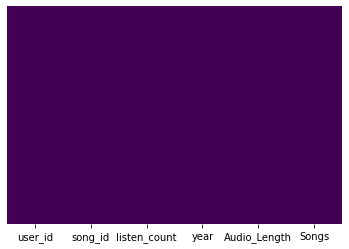

In [57]:
sns.heatmap(songs1.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [58]:
songs1.describe()

,listen_count,year
count,1793.000000,1793.000000
mean,2.738427,2010.001673
std,4.538299,0.052796
min,1.000000,2010.000000
25%,1.000000,2010.000000
50%,1.000000,2010.000000
75%,3.000000,2010.000000
max,126.000000,2012.000000


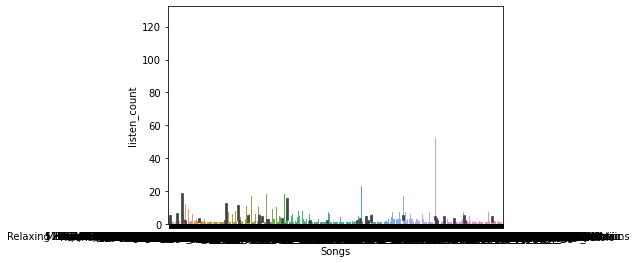

In [60]:
sns.barplot(x="Songs",y="listen_count",data=songs1)
plt.show()

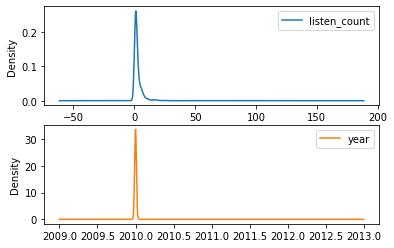

In [11]:
songs1.plot(kind='density', subplots=True, layout=(2,1), sharex=False)
plt.show()

In [66]:
# To create simple Report quickly
Music_profile=PR(songs1,title='Pandas Profiling Report',explorative=True)

In [67]:
Music_profile.to_file('Output1.html')

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [68]:
Music_profile1=sw.analyze(songs) # Using sweetviz
Music_profile1.show_html('analyze1.html',open_browser=False)

                                             |                                             | [  0%]   00:00 ->…

Report analyze1.html was generated.


In [19]:
# cummulative sum of listen count of the songs
songs_grouped=songs.groupby(['Songs']).agg({'listen_count':'count'}).reset_index()
songs_grouped.head(20)

,Songs,listen_count
0,Relax-Anton-1988,1
1,432 hz Healing Meditative Relax-Amusic7,1
2,528 Hz Relaxing Music-TineVibe,1
3,528Hz Ambient Relaxation Beautiful Morning-CAM...,1
4,A Relax-AudioFoodProd,1
5,A Relax-Lowtone,1
6,A Relax-NonGmo_Beats,1
7,A Relax-PrettyJohn,2
8,A Relax-SonicPulse,1
9,A Relax-SoundWStudio,1


In [20]:
grouped_sum=songs_grouped['listen_count'].sum()
songs_grouped['Percentage']=(songs_grouped['listen_count']/grouped_sum) * 100
songs_grouped.sort_values(['listen_count','Songs'],ascending=[0,1])

,Songs,listen_count,Percentage
1305,Relaxing Music-Cozy_Place,5,0.278862
989,Relaxation-meditative,4,0.223090
1425,Relaxing Sleep-meditative,4,0.223090
618,Relax Meditate-LuckyMagicSound,3,0.167317
706,Relax-Action_Monkey,3,0.167317
...,...,...,...
1722,Yoga Relaxing Meditation-DeepSoundProduction,1,0.055772
1723,Yoga Relaxing-backgroundmusic,1,0.055772
1724,Yoga Relaxing-red_carlos,1,0.055772
1725,Zen Life Relax-Amusic7,1,0.055772


## poupularity recommendation engine

In [21]:
pr=Recommenders.popularity_recommender_py()

In [22]:
pr.create(songs1,'user_id','Songs')

In [46]:
# it showing the same data bcz this are the popular songs listen by user 
pr.recommend(songs1['user_id'][1])

,user_id,Songs,score,Rank
1305,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relaxing Music-Cozy_Place,5,1.0
989,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relaxation-meditative,4,2.0
1425,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relaxing Sleep-meditative,4,3.0
618,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relax Meditate-LuckyMagicSound,3,4.0
706,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relax-Action_Monkey,3,5.0
849,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relax-dimadjdocent,3,6.0
1264,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relaxing Meditation-ElevAudio,3,7.0
1510,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relaxing-Lowtone,3,8.0
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,A Relax-PrettyJohn,2,9.0
231,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Deep Relaxing-Cozy_Place,2,10.0


In [47]:
pr.recommend(songs1['user_id'][5])

,user_id,Songs,score,Rank
1305,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relaxing Music-Cozy_Place,5,1.0
989,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relaxation-meditative,4,2.0
1425,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relaxing Sleep-meditative,4,3.0
618,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relax Meditate-LuckyMagicSound,3,4.0
706,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relax-Action_Monkey,3,5.0
849,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relax-dimadjdocent,3,6.0
1264,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relaxing Meditation-ElevAudio,3,7.0
1510,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relaxing-Lowtone,3,8.0
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,A Relax-PrettyJohn,2,9.0
231,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Deep Relaxing-Cozy_Place,2,10.0


# Item similarity recommendation

In [5]:
ir=Recommenders.item_similarity_recommender_py()

In [6]:
ir.create(songs1,'user_id','Songs')

In [7]:
user_items=ir.get_user_items(songs1['user_id'][1])

In [38]:
# This are the songs listen by user_id => 1
# Display user songs history
for user_item in user_items:
    print(user_item)

Relaxing Synth-AlexBoshMusic
Relax-TomyJiz
Relaxed-TomyJiz
Soft Relaxing Music-5VNDY
Peaceful Relaxing Ambient Corporate-5VNDY
Relaxing Calm Meditation-99Instrumentals
Ambient Relaxing-ABSounds
Relax-Alexiaction
Relax Ambient-AlfaSound
Relax Loop-Alien-Expo
Relax Meditate-AlisaMusic
Ambient Relax Minimal-AlisaMusic
Relax Minimalistic-AlisaMusic
Meditation Relax-AlisaMusic
Relax-AlisaMusic
Positive Relax-AlisaMusic
Hopeful Ambient Relax-AlisaMusic
Relaxing Piano with Nature Sounds-AllenGrey
Relax-amadasounds
Serenity Relax Music-AmbientBoy
Relax Piano-Andrepianoart
Ambient Relaxation-AneleArt
 Relax-Anton-1988
Relaxing Music For Meditation-apollotunes
Relaxing-ARCHIMUSIC
Cosmic Relax Meditation-ARCHIMUSIC
Relaxation-ARCHIMUSIC
Ambient Relaxing-ARCHIMUSIC
Relax-ArtHaiz
In Relax-ArtHaiz
Deep Relaxation-AShamaluev
Relax Ambient Corporate-ASteeland
Relax-AudioDealer
Relaxing-AudioDealer
Relax-AudioFortress
Minimal Relax-AudioSteals
Relaxation Dreaminess Autumn-Auftakt_Music
Relaxing Piano f

In [41]:
# Give songs recommendation for that user
ir.recommend(songs1['user_id'][1])

No. of unique songs for the user: 45
no. of unique songs in the training set: 1727
Non zero values in cooccurence_matrix :2278


,user_id,song,score,rank
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Just Relaxed-ExMusic,0.011111,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Slow Relaxed Day-ExMusic,0.011111,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Slowly and Relaxed-ExMusic,0.011111,3
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Slow Relaxed-ExMusic,0.011111,4
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The Relaxing-EightBallAudio,0.011111,5
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relaxing Piano-Eggplant_prod,0.011111,6
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relax Romantic-Dolphin-Mind,0.011111,7
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relaxing Piano-DHDMusic,0.011111,8
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relax Piano-DavidYAN,0.011111,9
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Relaxed-DavidYAN,0.011111,10


In [49]:
# Give songs recommendation for that user
ir.recommend(songs1['user_id'][150])

No. of unique songs for the user: 65
no. of unique songs in the training set: 1727
Non zero values in cooccurence_matrix :4242


,user_id,song,score,rank
0,b64cdd1a0bd907e5e00b39e345194768e330d652,Relaxing Ambient Meditation-mindful_sound,0.007692,1
1,b64cdd1a0bd907e5e00b39e345194768e330d652,Relaxing Piano-mindful_sound,0.007692,2
2,b64cdd1a0bd907e5e00b39e345194768e330d652,Ambient Relaxing Meditative-mindful_sound,0.007692,3
3,b64cdd1a0bd907e5e00b39e345194768e330d652,Relax-MikeStown,0.007692,4
4,b64cdd1a0bd907e5e00b39e345194768e330d652,The Relaxing Sleep-meditative,0.007692,5
5,b64cdd1a0bd907e5e00b39e345194768e330d652,A Relaxing Sleep-meditative,0.007692,6
6,b64cdd1a0bd907e5e00b39e345194768e330d652,Relaxing Sleep-MaryJaneMusicStudio,0.007692,7
7,b64cdd1a0bd907e5e00b39e345194768e330d652,Deep Relax-MaryJaneMusicStudio,0.007692,8
8,b64cdd1a0bd907e5e00b39e345194768e330d652,Relaxing Meditation-Markerj,0.007692,9
9,b64cdd1a0bd907e5e00b39e345194768e330d652,Meditation And Relax Background-Manriquedelara,0.007692,10


In [9]:
# Give related songs based on words
ir.get_similar_items(['Relaxing Ambient Meditation-mindful_sound'])

no. of unique songs in the training set: 1727
Non zero values in cooccurence_matrix :18


,user_id,song,score,rank
0,,Relaxing Piano-mindful_sound,1.0,1
1,,Ambient Relaxing Meditative-mindful_sound,1.0,2
2,,Relax-MikeStown,1.0,3
3,,The Relaxing Sleep-meditative,1.0,4
4,,A Relaxing Sleep-meditative,1.0,5
5,,Relaxing Sleep-MaryJaneMusicStudio,1.0,6
6,,Deep Relax-MaryJaneMusicStudio,1.0,7
7,,Relaxing Meditation-Markerj,1.0,8
8,,Meditation And Relax Background-Manriquedelara,1.0,9
9,,Relax And Meditation Ambient Background-Manriq...,1.0,10


## Content based recommendation engine

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf=TfidfVectorizer(min_df=3,max_features=None,strip_accents='unicode',
                     analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,3),stop_words='english')

In [6]:
import pickle
pickle_out=open("songs1.pkl","wb")
pickle.dump(songs1,pickle_out)
pickle_out.close()

In [9]:
pickle.dump(songs1.to_dict(),open('songs_dict.pkl','wb')) # converting into dict for trying purpose only

In [7]:
pickle.dump(similarity,open('similarity.pkl','wb'))

NameError: name 'similarity' is not defined